In [53]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
data = pd.read_csv('data_clean.csv')

/tmp/ipykernel_258473/2663429380.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_clean.csv')


In [55]:
data

,produit,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,Bonneterre : Chocolat Noir Costa Rica 75% De ...,Sugary snacks,556.0,44.0,27.000000,30.000000,24.000000,10.000000,0.030000,0.011811
1,Franprix : Dégustation Lait......,Sugary snacks,572.4,38.0,22.000000,50.000000,49.000000,7.600000,0.190000,0.074803
2,Gullon : Biscuits Petit-Déjeuner Céréales Com...,Sugary snacks,413.2,14.0,1.300000,65.000000,1.400000,6.800000,0.650000,0.255906
3,Aurada : Galletas Tostadas......,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
4,SuperSol : Galletas Tostadas......,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
...,...,...,...,...,...,...,...,...,...,...
230970,Tartex : Pâté Shiitake......,NaN,214.7,17.9,4.749687,6.400000,16.592037,7.000000,1.267303,0.498955
230971,Gourmet Garden : Coriandre Gourmet Garden......,NaN,10.0,0.3,4.749687,33.922107,16.592037,7.099545,0.127000,0.050000
230972,Nacional : Spaghetti classica......,NaN,348.2,1.8,0.400000,71.000000,5.000000,12.000000,0.010160,0.004000
230973,Maggi : Soupe de queue de boeuf (potage oxtai...,NaN,366.3,11.9,0.500000,51.800000,7.200000,13.000000,14.732000,5.800000


# Analyse univariée

## Variable qualitative 

In [4]:
data['pnns_groups_1'].value_counts()

Sugary snacks              50234
Cereals and potatoes       37019
Milk and dairy products    27551
Composite foods            23626
Beverages                  22270
Fruits and vegetables      19057
Fat and sauces             18697
Fish Meat Eggs             17139
Salty snacks               15382
Name: pnns_groups_1, dtype: int64

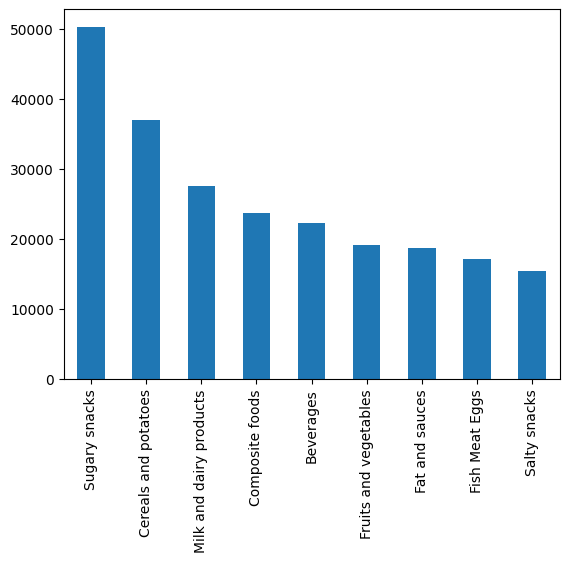

In [5]:
data['pnns_groups_1'].value_counts().plot.bar()
plt.show()

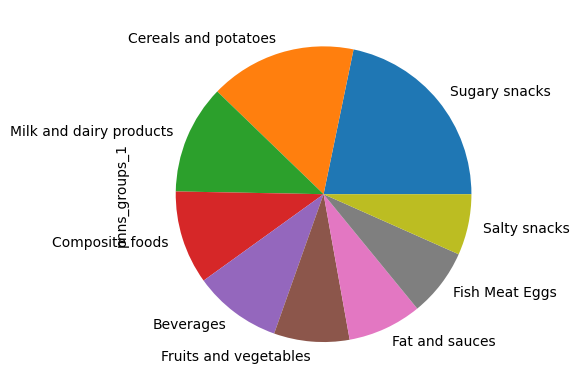

In [6]:
data['pnns_groups_1'].value_counts().plot.pie()
plt.show()

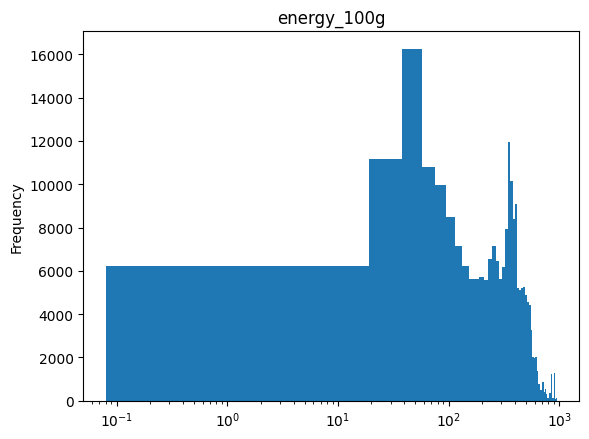

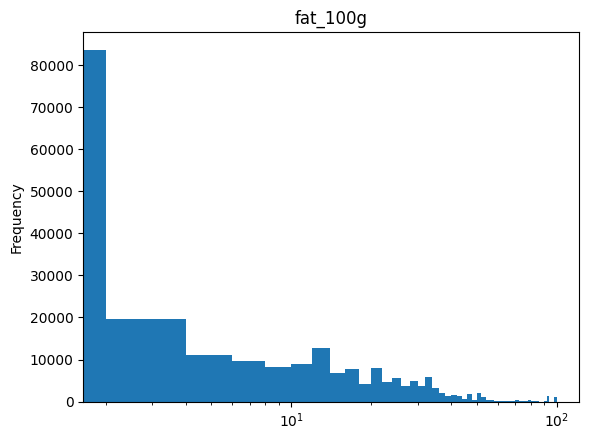

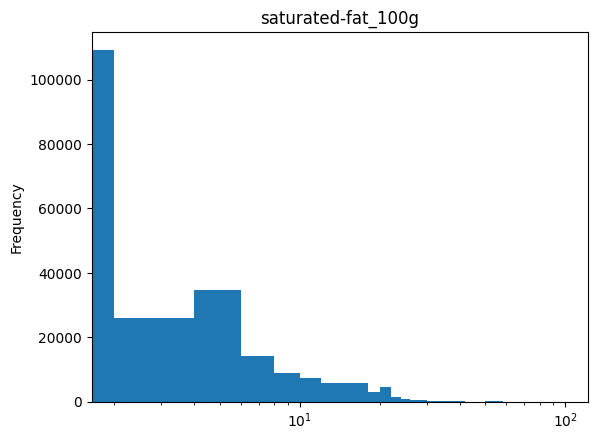

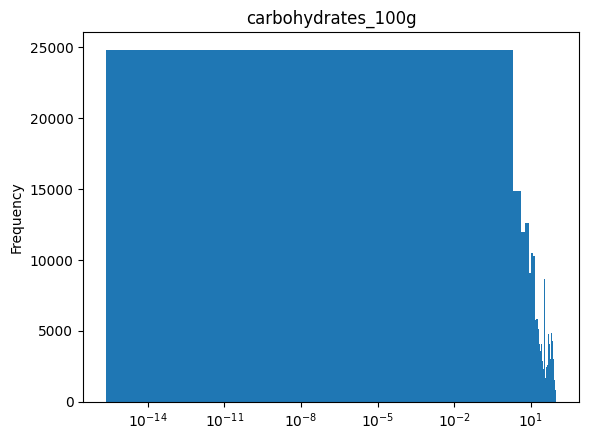

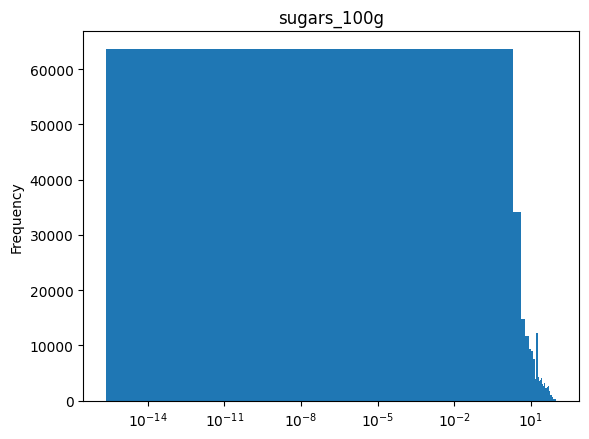

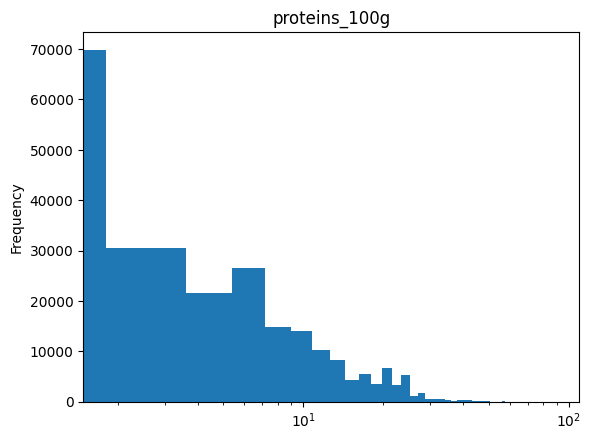

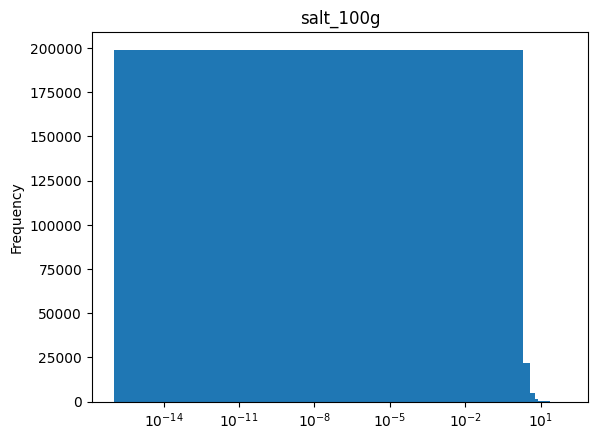

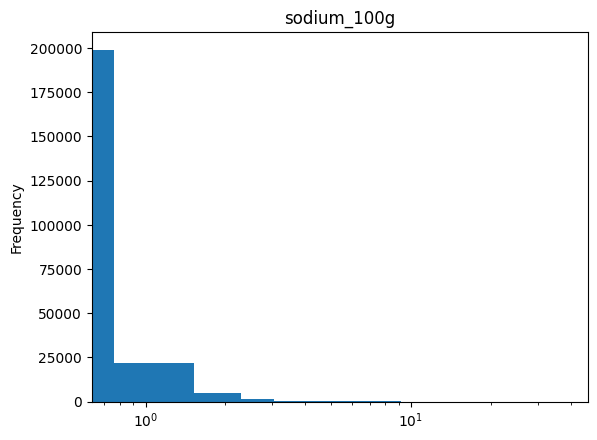

In [7]:
for col in ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
   # Tracer un histogramme avec une échelle logarithmique
   data[col].plot.hist(bins=50, logx=True)
   plt.title(col)
   plt.show()


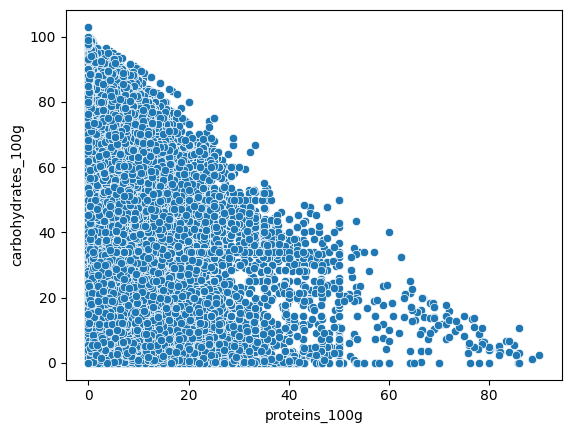

In [8]:
sns.scatterplot(x='proteins_100g', y='carbohydrates_100g', data=data)
plt.show()

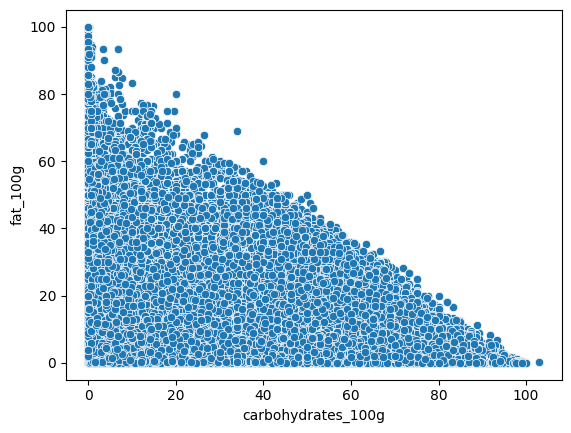

In [9]:
sns.scatterplot(x='carbohydrates_100g', y='fat_100g', data=data)
plt.show()

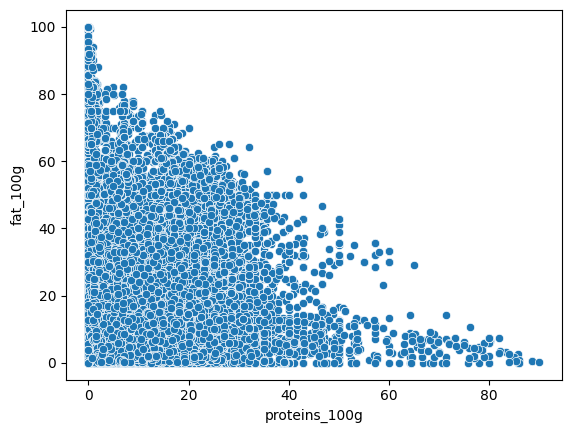

In [10]:
sns.scatterplot(x='proteins_100g', y='fat_100g', data=data)
plt.show()

In [11]:
data.columns

Index(['url', 'product_name', 'brands', 'pnns_groups_1', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [56]:
df=data.drop(labels = ['produit','pnns_groups_1'], axis = 1)

In [57]:
df.corr()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
energy_100g,1.000000,0.758417,0.519887,0.461812,0.280608,0.269981,-0.004992,-0.004990
fat_100g,0.758417,1.000000,0.675809,-0.123971,-0.057197,0.217647,-0.007393,-0.007392
saturated-fat_100g,0.519887,0.675809,1.000000,-0.064304,0.091854,0.155498,-0.006197,-0.006199
carbohydrates_100g,0.461812,-0.123971,-0.064304,1.000000,0.655700,-0.127576,-0.033617,-0.033616
sugars_100g,0.280608,-0.057197,0.091854,0.655700,1.000000,-0.281260,-0.096914,-0.096914
proteins_100g,0.269981,0.217647,0.155498,-0.127576,-0.281260,1.000000,0.102011,0.102020
salt_100g,-0.004992,-0.007393,-0.006197,-0.033617,-0.096914,0.102011,1.000000,0.999998
sodium_100g,-0.004990,-0.007392,-0.006199,-0.033616,-0.096914,0.102020,0.999998,1.000000


<AxesSubplot: >

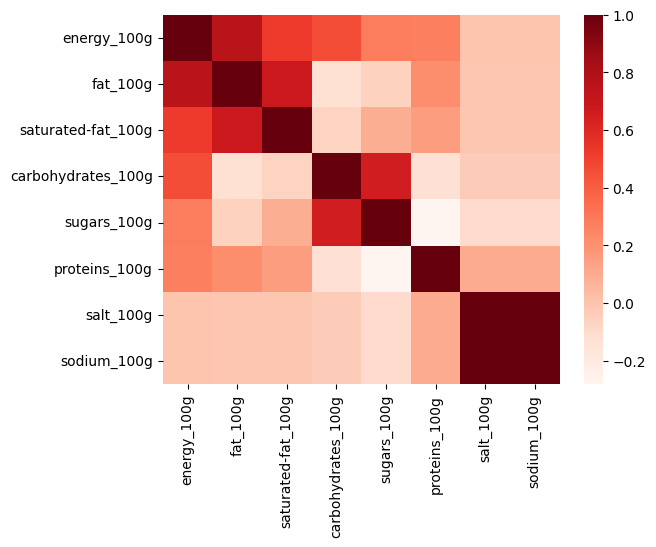

In [14]:
sns.heatmap(df.corr(), cmap="Reds")

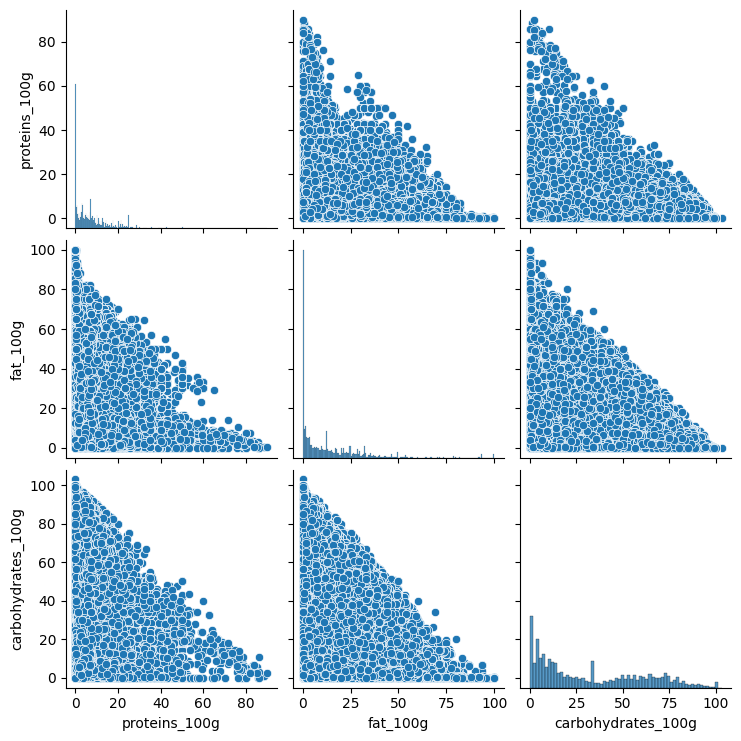

In [15]:
df = data[['proteins_100g', 'fat_100g', 'carbohydrates_100g']]

# Tracer un pairplot des colonnes sélectionnées
sns.pairplot(df)
plt.show()

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes quantitatives
X = data.iloc[:, 3:]

# Normalisation des données
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = scaler.fit_transform(X)

In [59]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
n_components = 6

pca = PCA(n_components=n_components)

pca.fit(X_scaled)

PCA(n_components=6)

In [19]:
pca.explained_variance_ratio_

array([0.30580338, 0.2646798 , 0.2206825 , 0.11148566, 0.05836473,
       0.03402862])

In [20]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.58, 26.47, 22.07, 11.15,  5.84,  3.4 ])

In [21]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 31.,  57.,  79.,  90.,  96., 100.])

In [22]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

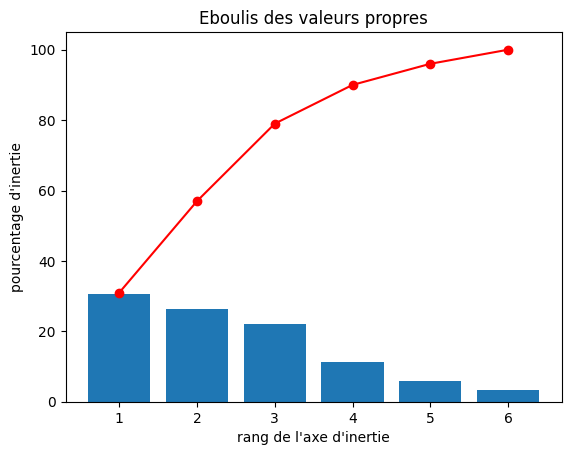

In [23]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [24]:
pcs = pca.components_
pcs

array([[ 0.5937645 ,  0.54821508,  0.49334853,  0.18472131,  0.17544659,
         0.19160692, -0.03077804, -0.03077675],
       [-0.02251154,  0.13222326,  0.08796572, -0.2991408 , -0.34889984,
         0.26211021,  0.58921692,  0.58921779],
       [ 0.11777832, -0.21873578, -0.15198101,  0.55931537,  0.50816555,
        -0.22973389,  0.38166839,  0.38166787],
       [ 0.16538964, -0.21697037, -0.36872551,  0.30678683, -0.09230519,
         0.82162181, -0.07717621, -0.07716643],
       [-0.38527886, -0.33060474,  0.58147363, -0.17831376,  0.48342819,
         0.37235296,  0.00137453,  0.0013753 ],
       [-0.02093061, -0.36686716,  0.5005985 ,  0.50199167, -0.58853648,
        -0.12452318, -0.01572274, -0.01573188]])

In [25]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.593764,0.548215,0.493349,0.184721,0.175447,0.191607,-0.030778,-0.030777
1,-0.022512,0.132223,0.087966,-0.299141,-0.348900,0.262110,0.589217,0.589218
2,0.117778,-0.218736,-0.151981,0.559315,0.508166,-0.229734,0.381668,0.381668
3,0.165390,-0.216970,-0.368726,0.306787,-0.092305,0.821622,-0.077176,-0.077166
4,-0.385279,-0.330605,0.581474,-0.178314,0.483428,0.372353,0.001375,0.001375
5,-0.020931,-0.366867,0.500598,0.501992,-0.588536,-0.124523,-0.015723,-0.015732


In [26]:
pcs.columns

RangeIndex(start=0, stop=8, step=1)

In [27]:
features = X.columns

In [28]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
F1,0.59,0.55,0.49,0.18,0.18,0.19,-0.03,-0.03
F2,-0.02,0.13,0.09,-0.30,-0.35,0.26,0.59,0.59
F3,0.12,-0.22,-0.15,0.56,0.51,-0.23,0.38,0.38
F4,0.17,-0.22,-0.37,0.31,-0.09,0.82,-0.08,-0.08
F5,-0.39,-0.33,0.58,-0.18,0.48,0.37,0.00,0.00
F6,-0.02,-0.37,0.50,0.50,-0.59,-0.12,-0.02,-0.02


In [29]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.593764,-0.022512,0.117778,0.165390,-0.385279,-0.020931
fat_100g,0.548215,0.132223,-0.218736,-0.216970,-0.330605,-0.366867
saturated-fat_100g,0.493349,0.087966,-0.151981,-0.368726,0.581474,0.500598
carbohydrates_100g,0.184721,-0.299141,0.559315,0.306787,-0.178314,0.501992
sugars_100g,0.175447,-0.348900,0.508166,-0.092305,0.483428,-0.588536
proteins_100g,0.191607,0.262110,-0.229734,0.821622,0.372353,-0.124523
salt_100g,-0.030778,0.589217,0.381668,-0.077176,0.001375,-0.015723
sodium_100g,-0.030777,0.589218,0.381668,-0.077166,0.001375,-0.015732


<AxesSubplot: >

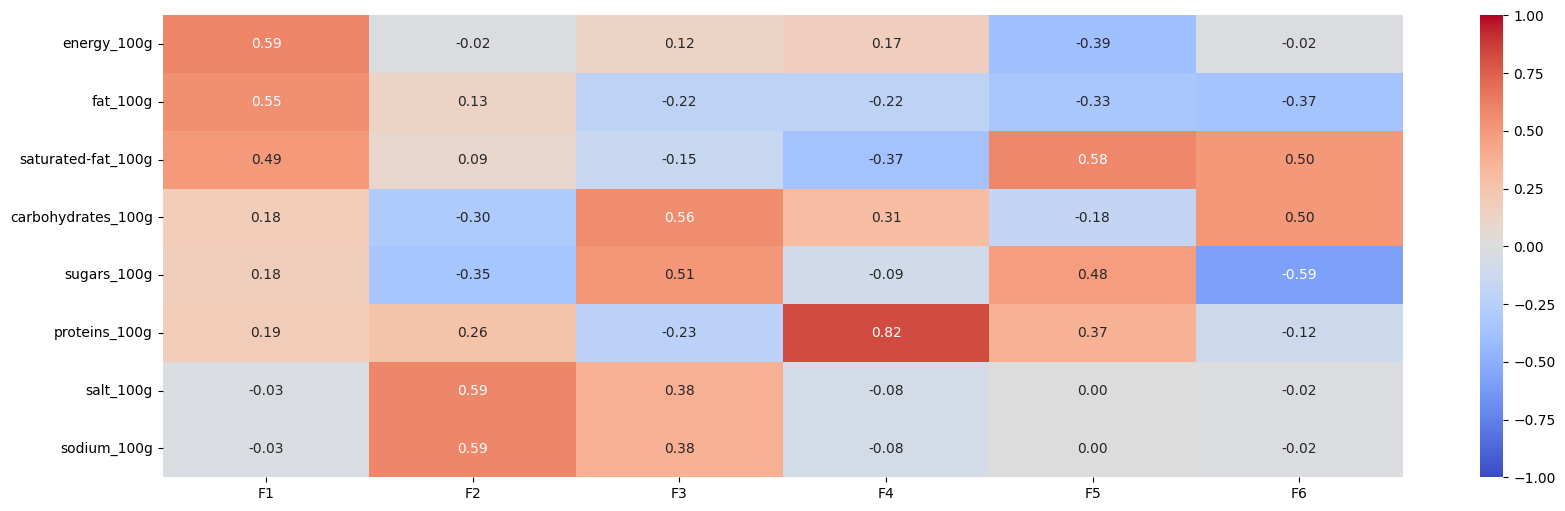

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [31]:
x, y = 0,1

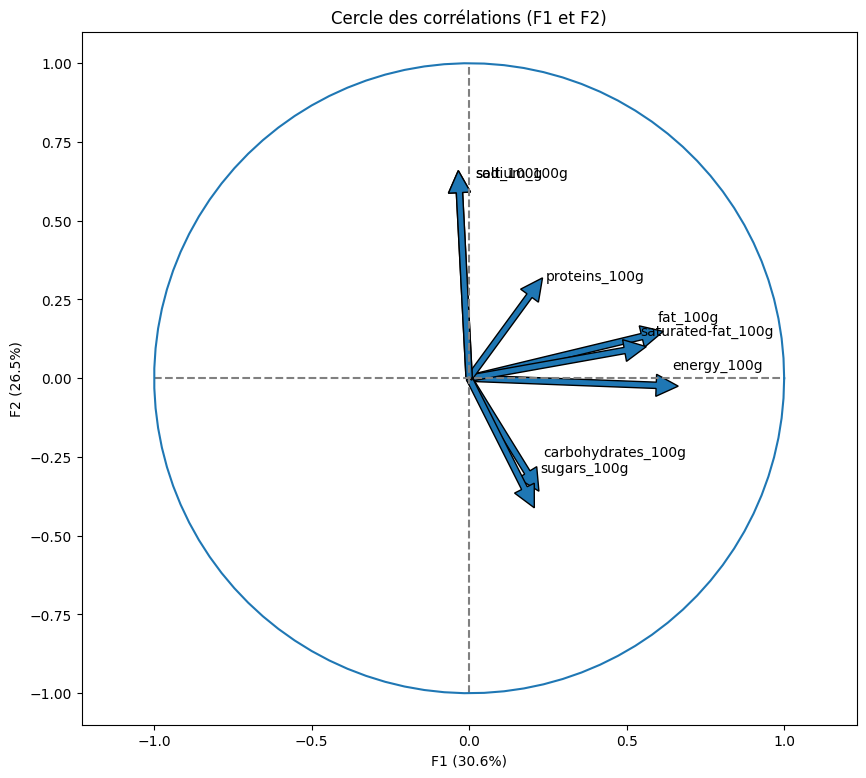

In [32]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [33]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Ajoute un cercle unitaire pour échelle

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [34]:
x_y = (0,1)

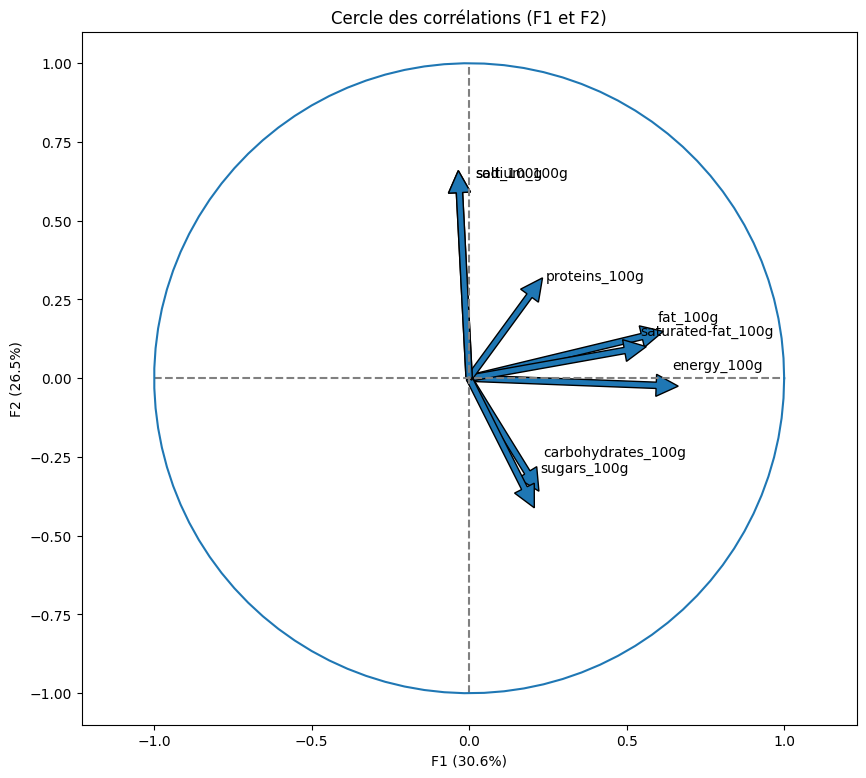

In [35]:
correlation_graph(pca, x_y, features)

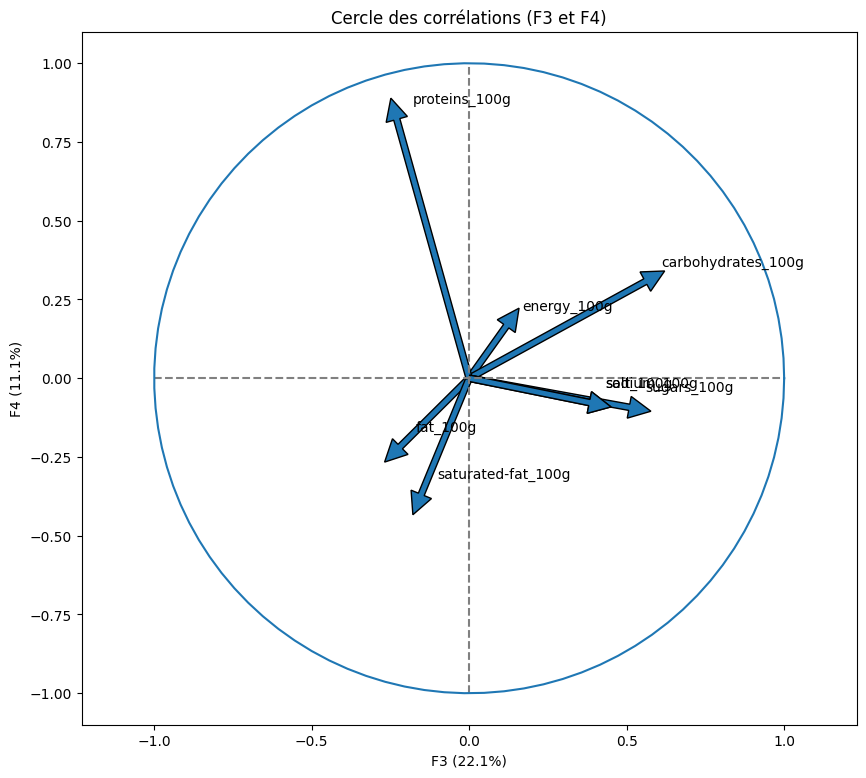

In [36]:
correlation_graph(pca, (2,3), features)

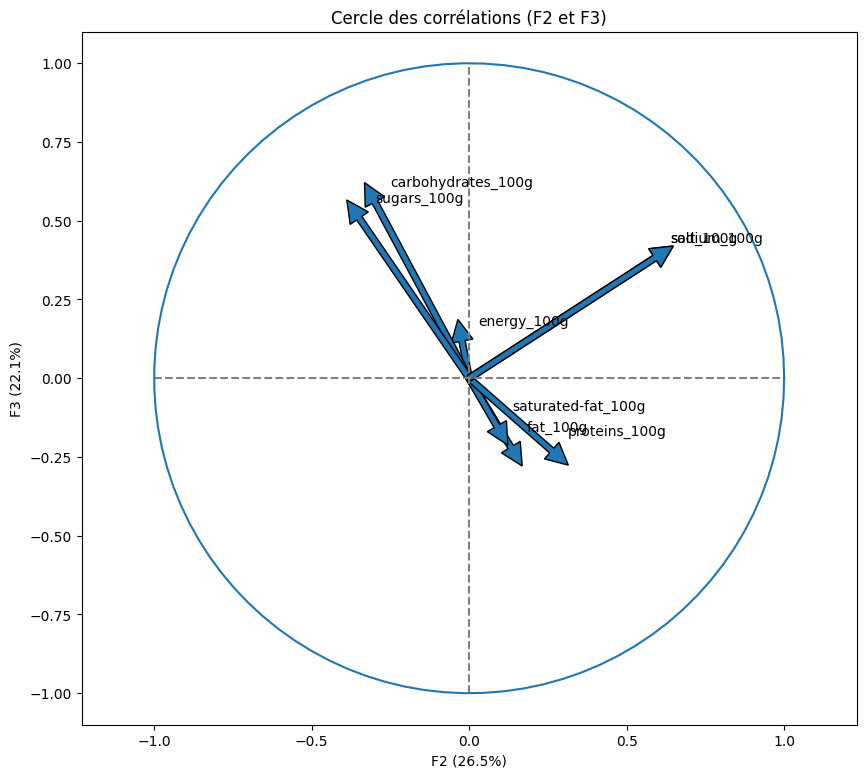

In [37]:
correlation_graph(pca, (1,2), features)

In [38]:
def correlation_graph(pca, x_y, features):
    """Affiche le graphe des correlations

    Positional arguments:
    -----------------------------------
    pca: sklearn.decomposition.PCA: notre objet PCA qui a été fit
    x_y: list ou tuple: le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features: list ou tuple: la liste des features (ie des dimensions) à représenter
    """
    # Extrait x et y
    x, y = x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Créer une liste de marqueurs de points de données
    markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']

    # Créer une liste d'éléments de légende
    legend_elements = []
    for i in range(pca.components_.shape[1]):
        # Tracer le point de données sur le graphique
        plt.scatter(pca.components_[x, i], pca.components_[y, i], marker=markers[i])
        # Ajouter l'élément de légende
        legend_elements.append(plt.scatter([], [], marker=markers[i], label=features[i]))

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('F{} ({}%)'.format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x + 1, y + 1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Ajoute un cercle unitaire pour échelle

    # Ajouter la légende
    plt.legend(handles=legend_elements)

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [39]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 3.52408147,  0.00596975, -0.91340717, -1.01321429,  0.98619014,
         0.53327757],
       [ 3.32408594, -0.76258061,  0.41433807, -0.81815275,  1.02134029,
        -0.02381744],
       [ 0.29248903, -0.3671028 ,  0.30788947,  0.68949744, -1.14468985,
         0.71980025],
       [ 0.70557762, -0.76427906,  1.04863245,  0.60524858, -0.3947644 ,
         0.70416932],
       [ 0.70557762, -0.76427906,  1.04863245,  0.60524858, -0.3947644 ,
         0.70416932]])

In [40]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

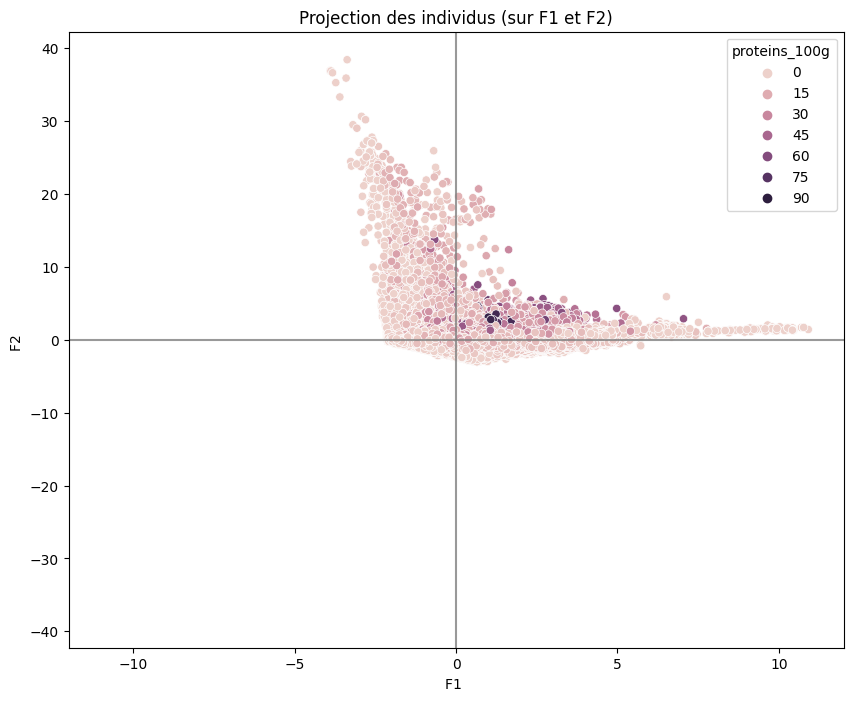

In [41]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df['proteins_100g'])

In [42]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 20)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lolonois/.local/li

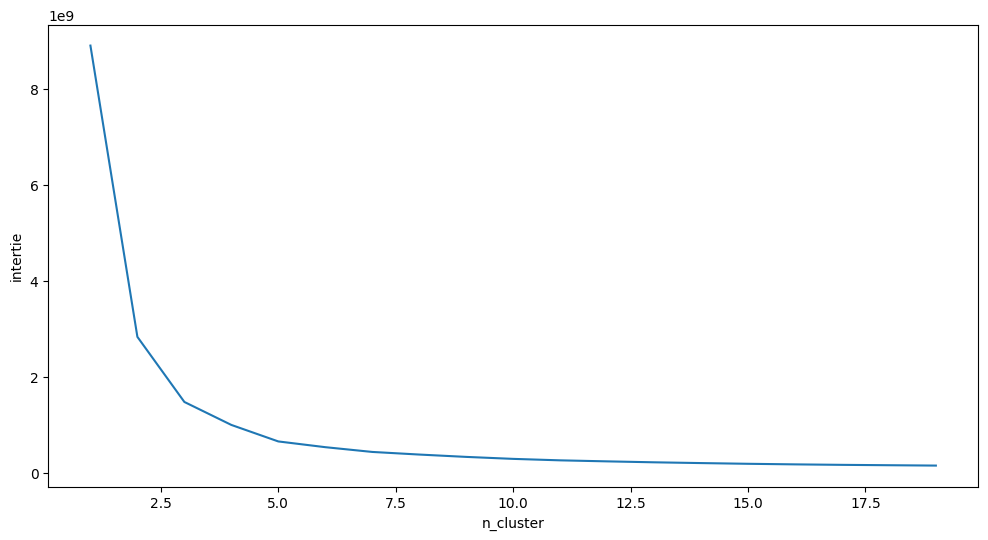

In [43]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [44]:
x_proj = pd.DataFrame(X_proj[:,:4], columns = ['F1', 'F2','F3','F4'])

In [45]:
x_proj

,F1,F2,F3,F4
0,3.524081,0.005970,-0.913407,-1.013214
1,3.324086,-0.762581,0.414338,-0.818153
2,0.292489,-0.367103,0.307889,0.689497
3,0.705578,-0.764279,1.048632,0.605249
4,0.705578,-0.764279,1.048632,0.605249
...,...,...,...,...
230970,-0.218194,0.340152,-0.565643,-0.426918
230971,-1.209114,-0.512969,-0.215337,-0.010476
230972,-0.152745,-0.672804,0.338120,1.454739
230973,-0.153274,5.439749,3.643661,0.456884


In [46]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_proj)

/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [47]:
dd = {i:j for i,j in enumerate(list("abcde"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [48]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['b', 'b', 'e', 'a', 'a', 'a', 'a', 'a', 'e', 'b']

In [49]:
x_proj["cluster"] = labels
x_proj

,F1,F2,F3,F4,cluster
0,3.524081,0.005970,-0.913407,-1.013214,b
1,3.324086,-0.762581,0.414338,-0.818153,b
2,0.292489,-0.367103,0.307889,0.689497,e
3,0.705578,-0.764279,1.048632,0.605249,a
4,0.705578,-0.764279,1.048632,0.605249,a
...,...,...,...,...,...
230970,-0.218194,0.340152,-0.565643,-0.426918,c
230971,-1.209114,-0.512969,-0.215337,-0.010476,c
230972,-0.152745,-0.672804,0.338120,1.454739,e
230973,-0.153274,5.439749,3.643661,0.456884,e


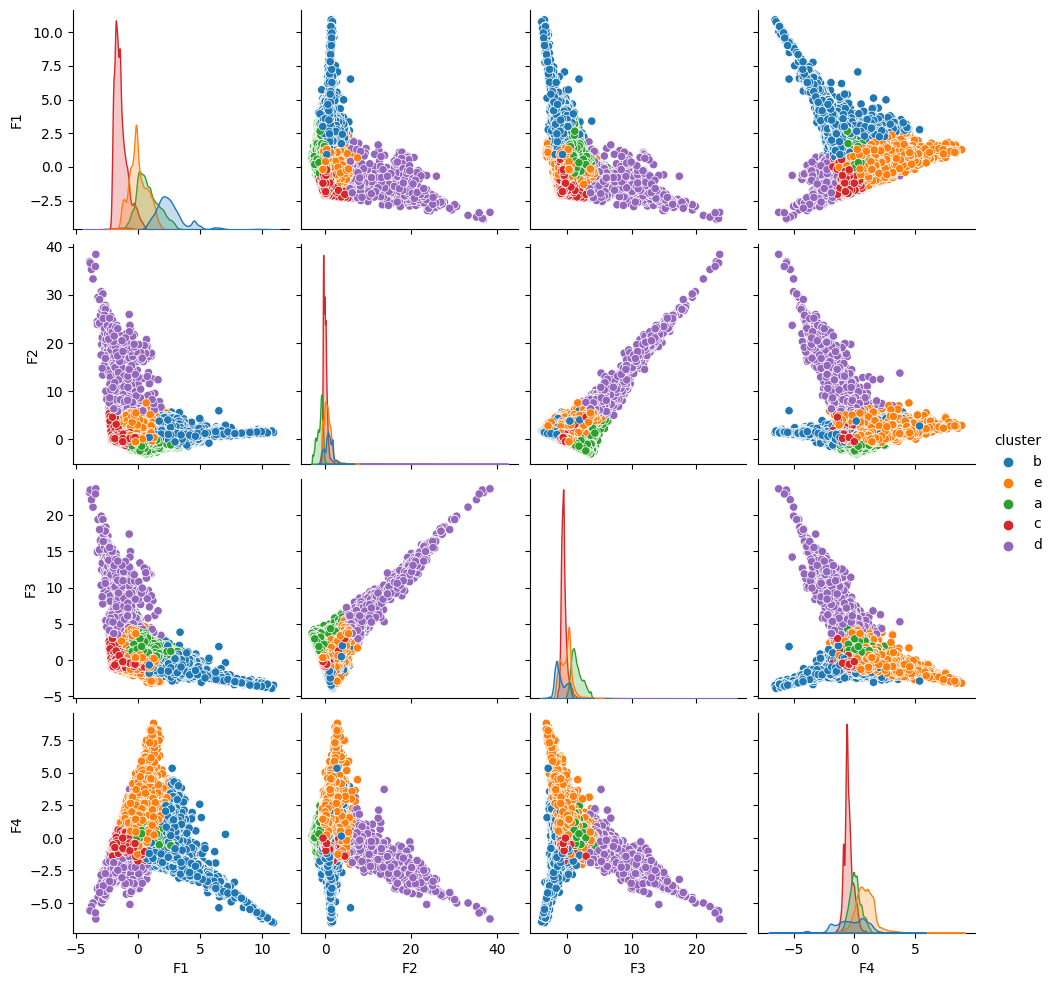

In [50]:
sns.pairplot(x_proj, hue="cluster")

In [51]:
x_proj

,F1,F2,F3,F4,cluster
0,3.524081,0.005970,-0.913407,-1.013214,b
1,3.324086,-0.762581,0.414338,-0.818153,b
2,0.292489,-0.367103,0.307889,0.689497,e
3,0.705578,-0.764279,1.048632,0.605249,a
4,0.705578,-0.764279,1.048632,0.605249,a
...,...,...,...,...,...
230970,-0.218194,0.340152,-0.565643,-0.426918,c
230971,-1.209114,-0.512969,-0.215337,-0.010476,c
230972,-0.152745,-0.672804,0.338120,1.454739,e
230973,-0.153274,5.439749,3.643661,0.456884,e


<AxesSubplot: >

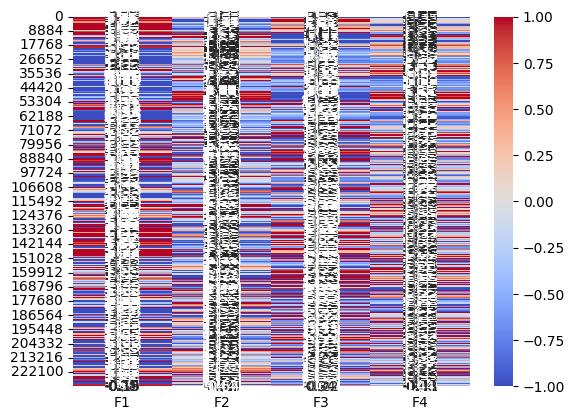

In [52]:
sns.heatmap(x_proj.drop(labels='cluster',axis = 1), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")